In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm, trange

from tabicl.prior.prior_config import DEFAULT_SAMPLED_HP
from tabicl.prior.hp_sampling import HpSampler, HpSamplerList

/Users/elias/anaconda3/envs/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sampler_list = HpSamplerList(DEFAULT_SAMPLED_HP, device='cpu')
sampler = sampler_list.sample()
sampler

{'multiclass_type': 'rank',
 'mlp_activations': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_choice_mixed_sampler.<locals>.sampler.<locals>.<lambda>()>,
 'block_wise_dropout': True,
 'mlp_dropout_prob': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_beta_sampler.<locals>.sampler.<locals>.<lambda>()>,
 'is_causal': False,
 'num_causes': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'y_is_effect': True,
 'in_clique': True,
 'sort_features': False,
 'num_layers': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'hidden_dim': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'init_std': <function tabicl.prior.hp_sampling.HpSampler.setup_meta_trunc_norm_log_scaled_sampler.<locals>.sampler.<locals>.sub_sampler()>,
 'noise_std': <funct

In [3]:
n_meta_samples, n_samples = 1000, 1
# n_meta_samples, n_samples = 100, 1

mlp_dropout_probs = []
block_wise_dropout = []
is_causals = []
hidden_dims = []
num_layers = []
for meta_sample_idx in trange(n_meta_samples):
    sampler = sampler_list.sample()
    mlp_dropout_probs.append([sampler['mlp_dropout_prob']() for _ in range(n_samples)])
    block_wise_dropout.append(sampler['block_wise_dropout'])
    is_causals.append(sampler['is_causal'])
    hidden_dims.append([sampler['hidden_dim']() for _ in range(n_samples)])
    num_layers.append([sampler['num_layers']() for _ in range(n_samples)])
mlp_dropout_probs = np.array(mlp_dropout_probs)


100%|██████████| 1000/1000 [00:01<00:00, 540.23it/s]


Text(0.5, 0, '*Stacked* Number of Layers Distributions')

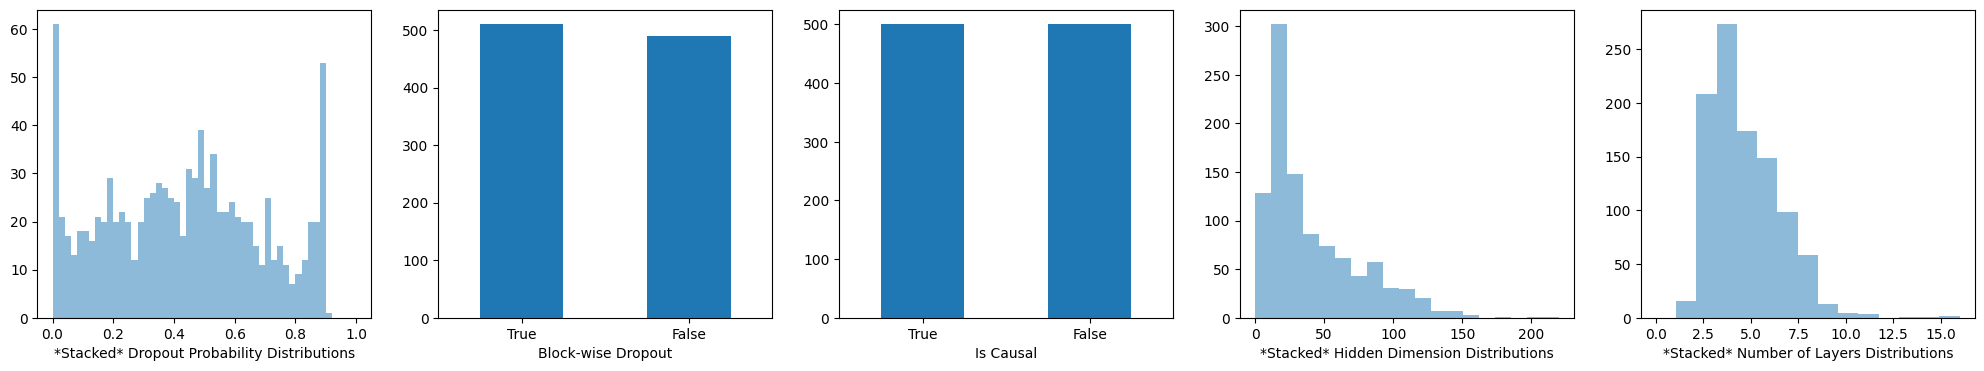

In [4]:
n_cols = 5
fig, axs = plt.subplots(1, n_cols, figsize=(n_cols * 5, 4))

# for i in range(n_meta_samples):
#     ax.hist(mlp_dropout_probs[i], bins=np.linspace(0, 1, 51), alpha = 0.05, density=False, color='tab:blue')
axs[0].hist(np.concatenate(mlp_dropout_probs), bins=np.linspace(0, 1, 51), alpha=0.5, density=False, color='tab:blue')
axs[0].set_xlabel('*Stacked* Dropout Probability Distributions')

pd.Series(block_wise_dropout).value_counts().plot(kind='bar', ax=axs[1], xlabel='Block-wise Dropout', rot=0)

pd.Series(is_causals).value_counts().plot(kind='bar', ax=axs[2], xlabel='Is Causal', rot=0)

axs[3].hist(hidden_dims_cat := np.concatenate(hidden_dims), bins=np.linspace(0, max(hidden_dims_cat) + 1, min(20, max(hidden_dims_cat) + 1)), alpha=0.5, density=False, color='tab:blue')
axs[3].set_xlabel('*Stacked* Hidden Dimension Distributions')

axs[4].hist(num_layers_cat := np.concatenate(num_layers), bins=np.linspace(0, max(num_layers_cat) + 1, min(20, max(num_layers_cat) + 1)), alpha=0.5, density=False, color='tab:blue')
axs[4].set_xlabel('*Stacked* Number of Layers Distributions')

